In [34]:
import pathlib

External packages.

In [35]:
import ipywidgets
import itk
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from skimage import filters
from PIL import Image
from matplotlib import image

Utility functions.

In [36]:
def edgemap(image):
    from scipy.ndimage import sobel
    dx = sobel(image, axis=0)
    dy = sobel(image, axis=1)
    return np.hypot(dx, dy)

In [37]:
def imread(filepath):
    image = itk.imread(str(filepath))
    size = np.asarray(itk.size(image))
    spacing = np.asarray(itk.spacing(image))
    center = -(size - 1) * spacing / 2
    orientation = itk.array_from_matrix(image.GetDirection())
    image.SetOrigin(orientation @ center)
    image = itk.cast_image_filter(image, ttype=(type(image),itk.Image[itk.F,3]))
    return image

In [38]:
def mask(fg, bg=(0,0,0), alpha=1, n=256):
    from matplotlib import colors
    fg = colors.to_rgb(fg)
    bg = colors.to_rgb(bg)
    cmap = colors.LinearSegmentedColormap.from_list('binary', (bg,fg), n)
    cmap._init()
    cmap._lut[:,-1] = np.linspace(0, alpha, cmap.N + 3)
    return cmap

open CT file 

In [39]:
# File path. 
ct_filepath_cadaver = pathlib.Path(r"C:\Users\asong18\Desktop\Deep_RL_View_Planning\4_1mm.mha")


In [40]:
ct = imread(ct_filepath_cadaver)

# incorporate translation in order to align the images. 
# transform = itk.AffineTransform.D3.New()
# transform.SetTranslation((0, 13, 0))

# Changing the pixels (resolution and dimensions) of an US to match CT. This is the process of resampling. Interpolated using nearest neighbor?
# Also applies the transformation mentioned above. 
# ct = itk.resample_image_filter(ct, output_parameters_from_image=us, transform=transform)
# ct_bone = np.array(ct)
# ct_bone[ct_bone < 200] = 0
# index = ct.shape[0] // 2

In [41]:
index = ct.shape[0] // 2
fig, axs = plt.subplots(ncols=1, figsize=(12,3), subplot_kw={'xticks':(),'yticks':()})
plt.subplots_adjust(wspace=0.1)
plt.close(fig)
# this shows the Sagittal slice. 
im0 = axs.imshow(ct[index], cmap='gray')
windex = ipywidgets.IntSlider(index, min=0, max=ct.shape[0]-1, description='Frame', continuous_update=False)
woutput = ipywidgets.Output()
print(ct.shape)

(795, 405, 405)


In [42]:
@woutput.capture(clear_output=True, wait=True)
def func_ax(change):
    index = change.new
    im0.set_data(ct[index])
    display(fig)

# this chuck below will show you the CT data in sliced form along the z-axis. 

In [43]:
windex.observe(func_ax, names='value')
windex.notify_change({'name': 'value', 'new': windex.value, 'type': 'change'})
ipywidgets.VBox((windex, woutput))

# CT Cube for Testing, the anatomy of this cube is such that we want the RL model to learn how to center the anatomical structure in the FOV. The model needs to learn something that is robust and very unique, we think vertabrae? 


In [44]:
ct_cube = ct[191:484, :,:]


In [45]:
index_cube = ct_cube.shape[0] // 2
fig, axs = plt.subplots(ncols=1, figsize=(12,3), subplot_kw={'xticks':(),'yticks':()})
plt.subplots_adjust(wspace=0.1)
plt.close(fig)
# this shows the Sagittal slice. 
im0 = axs.imshow(ct_cube[index_cube], cmap='gray')
windex = ipywidgets.IntSlider(index_cube, min=0, max=ct_cube.shape[0]-1, description='Frame', continuous_update=False)
woutput = ipywidgets.Output()
print(ct_cube.shape)

(293, 405, 405)


In [46]:
@woutput.capture(clear_output=True, wait=True)
def func_ax(change):
    index = change.new
    im0.set_data(ct[index])
    display(fig)

In [47]:
windex.observe(func_ax, names='value')
windex.notify_change({'name': 'value', 'new': windex.value, 'type': 'change'})
ipywidgets.VBox((windex, woutput))

In [48]:

# # Save the data as .png image. 
# CT_save_path = r'C:\Users\asong18\Desktop\Deep_RL_View_Planning\CT_image_axial_vertabrae'

# count = 0
# for i in range (ct_cube.shape[0]):
#     ct_slice = ct_cube[i]
#     plt.imsave(CT_save_path + f"\cadaver_slice_{count}.png", ct_slice)
#     count = count+1

# Binarize the image. 

In [49]:
# # Save the data as .png image. 
# CT_save_path = r'C:\Users\asong18\Desktop\Deep_RL_View_Planning\CT_image_full_body_thresholded'

# count = 0
# for i in range (ct.shape[0]):
#     ct_slice = ct[i]

#     I = ct_slice
#     I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

#     img = Image.fromarray(I8)

#     # adds thresholding
#     cadaver_mask = img.point(lambda p: p > 160)

    
#     #cadaver_mask.save(CT_save_path + f"\gray_scale_slice_{count}.png")
#     #plt.imsave(CT_save_path + f"\cadaver_slice_{count}.png", ct_slice)
#     count = count+1

(0, 255)
(0, 1)


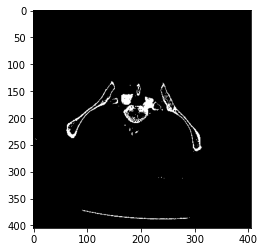

In [50]:
ct_slice = ct[177]

I = ct_slice
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
print(img.getextrema())
img = img.point(lambda p: p > 160)
print(img.getextrema())

plt.imshow(img, cmap ='gray')
plt.show()
#cadaver_mask = img > 0.6
#cadaver_mask.save(CT_save_path + f"\gray_scale_slice_{count}.png")
#plt.imsave(CT_save_path + f"\cadaver_slice_{count}.png", ct_slice)
#count = count+1

In [51]:
def show_two_images(imgLr, imgRr):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(np.rot90(imgLr,2), cmap = 'gray')
    f.add_subplot(1,2, 2)
    plt.imshow(np.rot90(imgRr,2), cmap = 'gray')
    plt.show(block=True)

In [52]:
camera = data.camera()
print(camera.shape)
# perform otsu thresholding. 
val = filters.threshold_otsu(camera)
mask = camera < val

(512, 512)


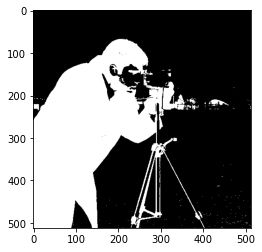

In [53]:
plt.imshow(mask, cmap = 'gray')
plt.show()

164025


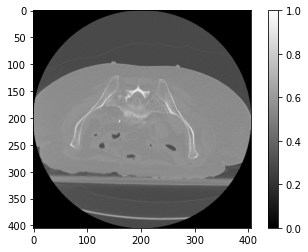

In [56]:
img = image.imread(r"C:\Users\asong18\Desktop\Deep_RL_View_Planning\CT_image_axial_full_body_grayscale\cadaver_slice_160.png")
#img = Image.open(r"C:\Users\asong18\Desktop\Deep_RL_View_Planning\CT_image_axial_vertabrae\cadaver_slice_177.png")
print(img.size)
plt.imshow(img, cmap ='gray')
plt.colorbar()
plt.show()

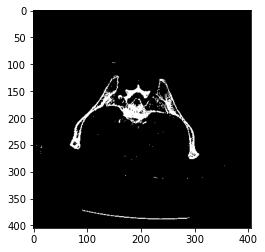

In [68]:
#threshold_otsu = filters.threshold_otsu(img)
cadaver_mask = img > 0.60
plt.imshow(cadaver_mask, cmap = 'gray')
plt.show()

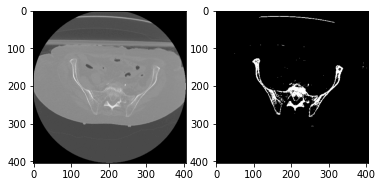

In [58]:
show_two_images(img, cadaver_mask)

# find the centroid of the image

Center a vertebrate in the FOV.

    Start with a small piece of the bone showing. 

        The agent takes an action into a new state.

Current action is up or down. 

    The environment will terminate if the vertebrate is completely out of the FOV. 
    
    This can be quantified by the centroid of the binarized image. 
    
    We want the agent to move to maximize the total pixel intensity. 
    
    Assume that when the centroid is in the center of the image, we have centered the vertebrate in the FOV. 


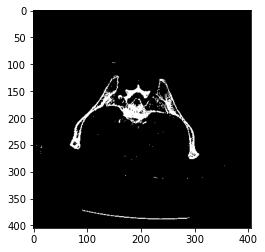

73 46


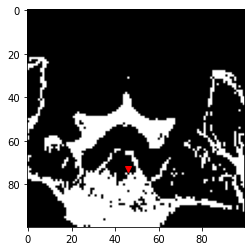

In [76]:
plt.imshow(cadaver_mask, cmap = 'gray')
plt.show()

# find centroid
cadaver_mask_1 = cadaver_mask[100:200,150:250 ]

count = (cadaver_mask_1 == 1).sum()
x_center, y_center = np.argwhere(cadaver_mask_1==1).sum(0)/count

print(int(np.ceil(x_center)), int(np.ceil(y_center)))

plt.plot( int(np.ceil(y_center)), int(np.ceil(x_center)),marker = 'v', color="red")
plt.imshow(cadaver_mask_1, cmap = 'gray')
plt.show()


# Find Rotation about the z-axis. 

Need to get this to work for the rotation experiment. 

Currently need the view to be what we are expecting. We are not getting proper resampling right now. 

In [ ]:
ct_cube = ct[49:454, :,:]
theta_x = 0
theta_y = 45
theta_z = 0
width, height, depth = ct.shape

# create transform object.
euler_transform = itk.Euler3DTransform.New()


# set angle for rotation.
ct.TransformIndexToPhysicalPoint((int(np.ceil(width/2)), int(np.ceil(height/2)), int(np.ceil(depth/2))))
euler_transform.SetRotation(np.deg2rad(theta_x), np.deg2rad(theta_y), np.deg2rad(theta_z))
ct_cube = itk.resample_image_filter(ct_cube, output_parameters_from_image=ct_cube, transform=euler_transform)